In [1881]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten

2.9.1


In [1882]:
#(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

In [1883]:
#trainX.shape

In [1884]:
#trainY.shape

In [1885]:
#trainY = to_categorical(trainY)
#testY = to_categorical(testY)

In [1886]:
#trainY.shape

In [1887]:
#testY.shape

In [1888]:
from tokenize import Number
import numpy as np
#np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

import time
from datetime import datetime
from datetime import timedelta
import math

In [1889]:
#datos para la conexion a la base de datos
hostname = '82.180.175.58'
username = 'u813407238_lora'
password = 'Seguimiento_lora_123'
database = 'u813407238_seguimiento'

In [1890]:
import MySQLdb
# inicialmente hace la conexion con la base de datos
myConnection = MySQLdb.connect( host=hostname, user=username, passwd=password, db=database )
import pandas as pd
# genera la lectura de la base de datos
dataset= pd.read_sql("SELECT * FROM LoRaWAN_messages_calle_5 order by id",myConnection)
print("Va a imprimir el dataset leido de la BD...")
#print(dataset)
#dataset[['COL 3','COL 4']].dtypes
#dataset = pd.DataFrame()
#dataset['T'] = dataset['date'] +' '+ dataset['time']
#dataset['date hour'] = dataset['date'] +' '+ dataset['hour']
#dataset = pd.to_datetime(dataset['date'] + dataset['time'])
print("Va a imprimir date y time...")

C:\Users\ander\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Va a imprimir el dataset leido de la BD...
Va a imprimir date y time...


In [1891]:
#pip install mysqlclient

In [1892]:
#dataset.head

In [1893]:
dataset.drop(index=dataset[dataset['latitude']=='0'].index, inplace=True)

In [1894]:
#dataset.info()

In [1895]:
time = dataset['hour']

In [1896]:
dataset

,id,dev_id,date,hour,latitude,longitude,speed,accx,accy,accz,gyrox,gyroy,gyroz,SF,BW,CR
17,18,tarjeta2-cubecell,2022-08-31,0 days 13:47:22,2.4494545,-76.6269796,0.62968,-0.1043366,-0.7579422,9.8896343,0.2024117,-0.2121214,0.0974049,7,125000,4/5
18,19,tarjeta2-cubecell,2022-08-31,0 days 13:47:33,2.4494231,-76.6269756,0,-0.1043366,-0.8920633,9.8225738,-0.041863,0.0474205,0.2042751,7,125000,4/5
19,20,tarjeta2-cubecell,2022-08-31,0 days 13:47:43,2.4493666,-76.6269073,0,-0.1211018,-0.7986575,9.7770684,0.2482132,-0.349526,0.0821378,7,125000,4/5
20,21,tarjeta2-cubecell,2022-08-31,0 days 13:47:54,2.4493663,-76.6268878,0,-0.1546321,-0.8369779,9.7722784,0.2482132,0.077955,0.1279393,7,125000,4/5
21,22,tarjeta2-cubecell,2022-08-31,0 days 13:48:06,2.4493705,-76.6268905,0,-0.1234968,-0.856138,9.8537091,0.324549,0.1084892,0.1890079,7,125000,4/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,275,tarjeta2-cubecell,2022-08-31,0 days 14:36:37,2.4503646,-76.6269323,24.13156,1.2033439,-2.9853105,7.638316,-0.4846112,-2.5938007,-2.5896177,7,125000,4/5
275,276,tarjeta2-cubecell,2022-08-31,0 days 14:36:48,2.4502795,-76.6266823,14.00112,-0.1091267,-6.2257719,11.5829132,-0.3930082,-8.9449462,13.8378629,7,125000,4/5
276,277,tarjeta2-cubecell,2022-08-31,0 days 14:37:26,2.4495106,-76.6269685,1.0186,-0.3198884,-3.7301616,10.454859,-0.0876646,-8.9449462,6.4027485,7,125000,4/5
277,278,tarjeta2-cubecell,2022-08-31,0 days 14:37:38,2.4494831,-76.6269721,0,2.4224089,-1.6872098,9.0681427,1.1642438,4.0321536,-1.6735874,7,125000,4/5


In [1897]:
dataset['latitude']=dataset['latitude'].astype('float64')
dataset['longitude']=dataset['longitude'].astype('float64')

In [1898]:
#dataset.info()

In [1899]:
d = pd.DataFrame()
d['latitud']=dataset['latitude']
d['longitude']=dataset['longitude']
d.to_csv('calle_5_original.csv')

In [1900]:
def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia

In [1901]:
time_step = 30

In [1902]:
last = int(len(dataset)/5.0)

In [1903]:
set_entrenamiento = dataset[:-last]
set_validacion = dataset[-last-time_step:]

In [1904]:
#set_entrenamiento.info()

In [1905]:
#set_validacion.info()

In [1906]:
set_entrenamiento.reset_index(inplace=True, drop=True)
#set_entrenamiento

In [1907]:
set_validacion.reset_index(inplace=True, drop=True)
#set_validacion

In [1908]:
#set_validacion.info()

In [1909]:
#set_entrenamiento.info()

In [1910]:
x= np.column_stack((set_entrenamiento.iloc[:,[4]],set_entrenamiento.iloc[:,[5]],set_entrenamiento.iloc[:,[8]],set_entrenamiento.iloc[:,[12]]))

In [1911]:
#x[0:1,:]

In [1912]:
#x[0]

In [1913]:
# Normalización del set de entrenamiento
sc1 = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc1.fit_transform(x)

In [1914]:
#set_entrenamiento_latitud_escalado=x

In [1915]:
#set_entrenamiento_latitud_escalado = np.array(set_entrenamiento_latitud_escalado).reshape(set_entrenamiento_latitud_escalado, ((set_entrenamiento_latitud_escalado.shape[0])/4), set_entrenamiento_latitud_escalado.shape[1], 4)

In [1916]:
# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

In [1917]:
for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0:5])
    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0:5])

In [1918]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [1919]:
Y_train.shape

(180, 4)

In [1920]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))

In [1921]:
X_train.shape

(180, 30, 4)

In [1922]:
# Red LSTM
#Para crear la red debemos primero definir el tamaño de los datos de entrada y del dato de salida,
#así como el número total de neuronas (100):
dim_in = (X_train.shape[1],4)
dim_out = 4
neurons = 100

In [1923]:
from keras.layers import Bidirectional
from tensorflow.keras.optimizers import SGD, Adam

In [1924]:
def build_model(hp):
    #definicion de hiperparámetros a evaluar
    hp_batch_size = hp.Int('batch_size', min_value = 8, max_value = 128, step = 8)
    hp_seed = hp.Int('seed', min_value =0, max_value = 100, step = 1)
    hp_activation = hp.Choice('activation',['relu','tanh','linear','selu','elu','softmax'])
    recurrent_dropout = hp.Float('recurrent_dropout',min_value=0.0,max_value=0.99,default=0.2)
    hp_neurons = hp.Int('neurons', min_value = 10, max_value = 200, step = 10)
    hp_neurons2 = hp.Int('neurons2', min_value = 10, max_value = 200, step = 10)
    hp_neurons3 = hp.Int('neurons3', min_value = 10, max_value = 200, step = 10)
    np.random.seed(hp_seed)
    #definición del modelo de red neuronal
    modelo = Sequential()
    modelo.add(LSTM(units=hp_neurons, activation=hp_activation, return_sequences=True, input_shape=dim_in))
    modelo.add(LSTM(hp_neurons2, activation=hp_activation, return_sequences=True))
    modelo.add(LSTM(hp_neurons3, activation=hp_activation, return_sequences=True))
    #modelo.add(LSTM(200, activation=hp_activation,  return_sequences=True))
    modelo.add(Flatten())
    modelo.add(Dropout(recurrent_dropout))
    modelo.add(Dense(units=dim_out,activation=hp_activation))
    
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3])
    opt = Adam(learning_rate=hp_learning_rate)#, momentum=0.9)
    modelo.compile(optimizer=opt, loss='mse', metrics=['mse'])
    #modelo.compile(optimizer='Adam', loss='mse')
    #modelo.fit(X_train,Y_train,epochs=10,batch_size=32)
    #print(modelo.summary())
    return modelo

In [1925]:
#pip install keras-tuner --upgrade

In [1926]:
import keras_tuner

In [1927]:
from keras_tuner.tuners import BayesianOptimization

In [1928]:
tuner = BayesianOptimization(
    build_model,
    objective = 'mse',
    overwrite=True,
    max_trials = 6)

In [1929]:
#definimos funcion de error y el método para minimizar
#modelo.compile(optimizer='RMSprop', loss='mse')

In [1930]:
#implementamos el modelo con 20 iteraciones, epochs
#Presentando a la res lstm lotess de 32 datos
#modelo.fit(X_train,Y_train,epochs=500,batch_size=32)
#epochs 100  batch=64 loss 0.0017
#epochs 100  batch=32 loss 0.0040
#epochs 20  batch=32 loss 0.0071

In [1931]:
#X_train.shape

In [1932]:
#x_test_latitud = set_validacion.iloc[:,4:5]
x_test= np.column_stack((set_validacion.iloc[:,[4]],set_validacion.iloc[:,[5]],set_validacion.iloc[:,[8]],set_validacion.iloc[:,[12]]))

In [1933]:
#x_test

In [1934]:
array_latitud = []
for x in range(len(x_test)):
    array_latitud.append(x_test[x,0])

In [1935]:
#array_latitud

In [1936]:
array_longitud = []
for x in range(len(x_test)):
    array_longitud.append(x_test[x,1])

In [1937]:
#array_longitud

In [1938]:
#sc2 = MinMaxScaler(feature_range=(0,1))
x_test_n = sc1.transform(x_test)
#x_test_n

In [1939]:
x_test_n.shape

(82, 4)

In [1940]:
#Obtenemos bloques de 60 datos
X_test = []
Y_test = []
for i in range(time_step,len(x_test_n)):
    X_test.append(x_test_n[i-time_step:i,0:5])
    Y_test.append(x_test_n[i,0:5])

In [1941]:
X_test = np.array(X_test)
X_test.shape

(52, 30, 4)

In [1942]:
Y_test = np.array(Y_test)
Y_test.shape

(52, 4)

In [1943]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],4))

In [1944]:
#Y_train = to_categorical(Y_train)
#Y_test = to_categorical(Y_test)
X_train.shape

(180, 30, 4)

In [1945]:
Y_train.shape

(180, 4)

In [1946]:
tuner.search(X_train, Y_train,
             epochs=100,
             #overwrite=True,
             validation_data=(X_test, Y_test))
            #)

Trial 6 Complete [00h 00m 32s]
mse: 0.0875830352306366

Best mse So Far: 0.010341338813304901
Total elapsed time: 00h 04m 22s
INFO:tensorflow:Oracle triggered exit


In [1947]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
batch_size: 8
seed: 0
activation: linear
recurrent_dropout: 0.0
neurons: 60
neurons2: 200
neurons3: 10
learning_rate: 0.001
Score: 0.010341338813304901
Trial summary
Hyperparameters:
batch_size: 24
seed: 58
activation: relu
recurrent_dropout: 0.052966469822015784
neurons: 10
neurons2: 20
neurons3: 20
learning_rate: 0.001
Score: 0.011318260803818703
Trial summary
Hyperparameters:
batch_size: 64
seed: 16
activation: linear
recurrent_dropout: 0.6349132653727549
neurons: 60
neurons2: 180
neurons3: 110
learning_rate: 0.001
Score: 0.01198942307382822
Trial summary
Hyperparameters:
batch_size: 72
seed: 73
activation: linear
recurrent_dropout: 0.7284767584483395
neurons: 60
neurons2: 170
neurons3: 170
learning_rate: 0.01
Score: 0.012664074078202248
Trial summary
Hyperparameters:
batch_size: 112
seed: 0
activation: relu
recurrent_dropout: 0.0
neurons: 10
neurons2: 200
neurons3: 10
learning_rate: 

In [1948]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
best_hps.values

{'batch_size': 8,
 'seed': 0,
 'activation': 'linear',
 'recurrent_dropout': 0.0,
 'neurons': 60,
 'neurons2': 200,
 'neurons3': 10,
 'learning_rate': 0.001}

In [1949]:
modelo = tuner.hypermodel.build(best_hps)
history = modelo.fit(X_train, Y_train,
                      epochs=100,batch_size=32,
                      validation_data=(X_test, Y_test))

Epoch 1/100
6/6 [==============================] - 3s 124ms/step - loss: 0.2307 - mse: 0.2307 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 2/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0657 - val_mse: 0.0657
Epoch 3/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0390 - val_mse: 0.0390
Epoch 4/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 5/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 6/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 7/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 8/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0171 - mse: 0.0

6/6 [==============================] - 0s 60ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 64/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 65/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 66/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 67/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 68/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 69/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 70/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0115 - mse: 0.0115 - 

In [1950]:
# evaluate model
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 24.629


In [1951]:
#Predecimos y normalizamos
prediccion = modelo.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [1952]:
prediccion

array([[ 0.7911823 ,  0.09268563,  0.48027962,  0.56453437],
       [ 0.85197914,  0.03073035,  0.5003629 ,  0.57726455],
       [ 0.8902786 , -0.00402121,  0.525126  ,  0.58397514],
       [ 0.9035544 , -0.00615278,  0.55729896,  0.5872431 ],
       [ 0.8785569 ,  0.02484578,  0.5943785 ,  0.582297  ],
       [ 0.8332673 ,  0.08513048,  0.6324497 ,  0.5769514 ],
       [ 0.76118255,  0.17023195,  0.6635909 ,  0.567279  ],
       [ 0.68792087,  0.27037674,  0.6834761 ,  0.5652858 ],
       [ 0.5871264 ,  0.3861301 ,  0.6845995 ,  0.5578797 ],
       [ 0.49955797,  0.5049591 ,  0.67408323,  0.56476986],
       [ 0.4230358 ,  0.6169108 ,  0.6516687 ,  0.5793871 ],
       [ 0.33757   ,  0.7182722 ,  0.62303174,  0.59143037],
       [ 0.29173696,  0.7905239 ,  0.58679825,  0.61341053],
       [ 0.2341427 ,  0.8555128 ,  0.56106865,  0.62163657],
       [ 0.1989343 ,  0.8987291 ,  0.5391473 ,  0.6275699 ],
       [ 0.14979114,  0.9305198 ,  0.53478456,  0.61674035],
       [ 0.11150028,  0.

In [1953]:
#prediccion[0][1]

In [1954]:
'''nw = list()
for x in range(0,len(prediccion)):
    new_item = list()
    new_item.append(prediccion, [[0],[0]], axis=1)
    nw.append(new_item)
nw = np.array(nw)'''

'nw = list()\nfor x in range(0,len(prediccion)):\n    new_item = list()\n    new_item.append(prediccion, [[0],[0]], axis=1)\n    nw.append(new_item)\nnw = np.array(nw)'

In [1955]:
#nw

In [1956]:
prediccion = sc1.inverse_transform(prediccion)
prediccion.shape

(52, 4)

In [1957]:
X_test.shape

(52, 30, 4)

In [1958]:
prediccion

array([[ 2.4515400e+00, -7.6630577e+01, -2.1345580e+00,  7.5964481e-01],
       [ 2.4518013e+00, -7.6631157e+01, -1.8838620e+00,  1.6793275e+00],
       [ 2.4519660e+00, -7.6631477e+01, -1.5747480e+00,  2.1641293e+00],
       [ 2.4520230e+00, -7.6631493e+01, -1.1731378e+00,  2.4002194e+00],
       [ 2.4519157e+00, -7.6631210e+01, -7.1028012e-01,  2.0428953e+00],
       [ 2.4517210e+00, -7.6630653e+01, -2.3504318e-01,  1.6567034e+00],
       [ 2.4514112e+00, -7.6629868e+01,  1.5368776e-01,  9.5792753e-01],
       [ 2.4510961e+00, -7.6628937e+01,  4.0191135e-01,  8.1393176e-01],
       [ 2.4506629e+00, -7.6627869e+01,  4.1593492e-01,  2.7888232e-01],
       [ 2.4502864e+00, -7.6626762e+01,  2.8466180e-01,  7.7665818e-01],
       [ 2.4499574e+00, -7.6625725e+01,  4.8650652e-03,  1.8326719e+00],
       [ 2.4495902e+00, -7.6624794e+01, -3.5260597e-01,  2.7027268e+00],
       [ 2.4493930e+00, -7.6624123e+01, -8.0490285e-01,  4.2906680e+00],
       [ 2.4491456e+00, -7.6623512e+01, -1.1260813e

In [1959]:
calle_5 = pd.DataFrame(prediccion[:,0:2])

In [1960]:
calle_5.to_csv('calle_5.csv')

In [1961]:
array_latitud_p = []
for x in range(len(prediccion)):
    array_latitud_p.append(prediccion[x,0])

In [1962]:
array_longitud_p = []
for x in range(len(prediccion)):
    array_longitud_p.append(prediccion[x,1])

In [1963]:
#array_latitud_p

In [1964]:
#array_longitud_p

In [1965]:
# Funciones auxiliares
def graficar_predicciones(real, prediccion,titulo):
    plt.plot(real[time_step:len(array_latitud)], color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
   # plt.ylim(-44,-43)
    plt.xlabel('Número de mediciones')
    plt.ylabel('Grados')
    plt.title(titulo)
    plt.legend()
    plt.show()

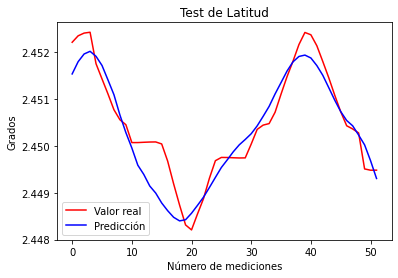

In [1966]:
# Graficar resultados
graficar_predicciones(array_latitud,array_latitud_p,'Test de Latitud')

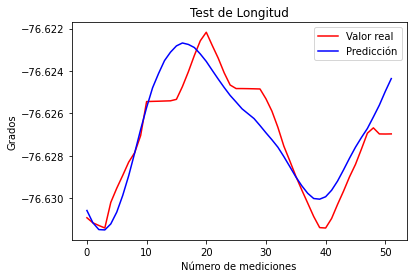

In [1967]:
graficar_predicciones(array_longitud,array_longitud_p, 'Test de Longitud')

In [1968]:
from sklearn.metrics import mean_squared_error

In [1969]:
mse_lat = mean_squared_error(array_latitud[time_step:],array_latitud_p, squared=False)

In [1970]:
mse_lat

0.0004366205738276164

In [1971]:
mse_lon = mean_squared_error(array_longitud[time_step:],array_longitud_p, squared=False)

In [1972]:
mse_lon

0.0011563385493020275

In [1973]:
haversine(0.00000,0.00000,mse_lat,mse_lon)

0.13747837797007753

In [1974]:
#Prediccion con los primeros datos del set de validacion
# Using predicted values to predict next step
X_pred = x_test_n.copy()
for i in range(time_step,len(X_pred)):
    xin = X_pred[i-time_step:i].reshape(1, time_step, 4)
    X_pred[i] = modelo.predict(xin)

1/1 [==============================] - 0s 12ms/step


In [1975]:
 len(X_pred)

82

In [1976]:
X_pred

array([[8.77050134e-01, 1.09233809e-01, 1.70567924e-01, 6.16441232e-01],
       [9.67639874e-01, 3.69546676e-02, 3.60706064e-01, 5.04226525e-01],
       [9.66592998e-01, 1.03317607e-02, 3.80660022e-01, 5.93195245e-01],
       [8.85122717e-01, 8.51803470e-02, 5.83269393e-01, 6.03338947e-01],
       [8.28940328e-01, 1.35327712e-01, 4.36684581e-01, 5.81994908e-01],
       [7.40839828e-01, 2.14192406e-01, 6.05142001e-01, 5.30431089e-01],
       [6.60672328e-01, 2.82261112e-01, 3.41135849e-01, 5.30431089e-01],
       [5.68081889e-01, 3.68758569e-01, 9.68150425e-01, 5.98689752e-01],
       [5.27439805e-01, 4.54532696e-01, 6.51381440e-01, 4.91335569e-01],
       [5.25159940e-01, 5.37910113e-01, 5.82118205e-01, 5.40152137e-01],
       [4.80051181e-01, 6.25390005e-01, 1.00000000e+00, 6.17497868e-01],
       [4.20658369e-01, 6.73486133e-01, 2.22563321e-01, 6.89771743e-01],
       [3.36117250e-01, 7.36588684e-01, 6.05717591e-01, 4.69568877e-01],
       [2.43922298e-01, 8.00975957e-01, 1.78242523e

In [1977]:
xin.shape

(1, 30, 4)

In [1978]:
prediccion2 = sc1.inverse_transform(X_pred)

In [1979]:
# Funciones auxiliares
def graficar_predicciones2(real, prediccion,campo,title):
    plt.plot(real[0:len(real)], color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
    #plt.ylim(-44,-43)
    plt.title(title)
    plt.xlabel('Numero de mediciones')
    plt.ylabel(campo)
    plt.legend()
    plt.show()

In [1980]:
prediccion2

array([[ 2.45190910e+00, -7.66304280e+01, -6.00064010e+00,
         4.50961870e+00],
       [ 2.45229850e+00, -7.66310975e+01, -3.62717580e+00,
        -3.59725140e+00],
       [ 2.45229400e+00, -7.66313441e+01, -3.37809370e+00,
         2.83022920e+00],
       [ 2.45194380e+00, -7.66306508e+01, -8.48953000e-01,
         3.56305360e+00],
       [ 2.45170230e+00, -7.66301863e+01, -2.67874800e+00,
         2.02106900e+00],
       [ 2.45132360e+00, -7.66294558e+01, -5.75920700e-01,
        -1.70412170e+00],
       [ 2.45097900e+00, -7.66288253e+01, -3.87146770e+00,
        -1.70412170e+00],
       [ 2.45058100e+00, -7.66280241e+01,  3.95545600e+00,
         3.22717590e+00],
       [ 2.45040630e+00, -7.66272296e+01,  1.27890000e-03,
        -4.52854910e+00],
       [ 2.45039650e+00, -7.66264573e+01, -8.63323100e-01,
        -1.00183160e+00],
       [ 2.45020260e+00, -7.66256470e+01,  4.35302920e+00,
         4.58595460e+00],
       [ 2.44994730e+00, -7.66252015e+01, -5.35158980e+00,
      

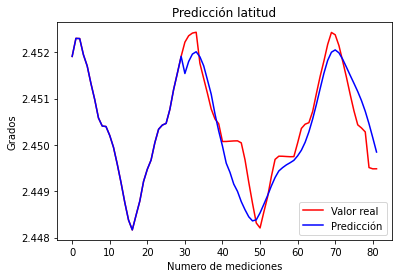

In [1981]:
# Graficar resultados de prediccion de valores futuros
graficar_predicciones2(array_latitud,prediccion2[:,0:1],'Grados','Predicción latitud')

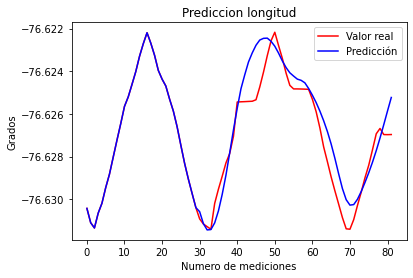

In [1982]:
graficar_predicciones2(array_longitud,prediccion2[:,1:2],'Grados','Prediccion longitud')

In [1983]:
mse_lat_p = mean_squared_error(array_latitud[time_step:],prediccion2[time_step:,0:1], squared=False)

In [1984]:
mse_lat_p

0.0004897620122827435

In [1985]:
mse_lon_p = mean_squared_error(array_longitud[time_step:],prediccion2[time_step:,1:2], squared=False)

In [1986]:
mse_lon_p

0.0010044847186599646

In [1987]:
haversine(0.00000,0.00000,mse_lat_p,mse_lon_p)

0.12429784427974265

In [1988]:
calle_5_p = pd.DataFrame(prediccion2[:,0:2])

In [1989]:
calle_5_p.to_csv('calle_5_p.csv')

In [1990]:
distancia_entrenamiento = []
distancia_entrenamiento.append(0)
for i in range(0, len(set_entrenamiento)-1):
    distancia_entrenamiento.append(haversine(set_entrenamiento.iat[i,4],set_entrenamiento.iat[i,5],set_entrenamiento.iat[i+1,4],set_entrenamiento.iat[i+1,5]))

In [1991]:
d_d_e = pd.DataFrame(distancia_entrenamiento, columns=['distancia'])
d_d_e

,distancia
0,0.000000
1,0.003521
2,0.009854
3,0.002167
4,0.000555
...,...
205,0.096939
206,0.099985
207,0.094909
208,0.084733


In [1992]:
len(distancia_entrenamiento)

210

In [1993]:
distancia_validacion = []
distancia_validacion.append(0)
for i in range(0, len(set_validacion)-1):
    distancia_validacion.append(haversine(set_validacion.iat[i,4],set_validacion.iat[i,5],set_validacion.iat[i+1,4],set_validacion.iat[i+1,5]))

In [1994]:
d_d_v = pd.DataFrame(distancia_validacion, columns=['distancia'])
d_d_v

,distancia
0,0.000000
1,0.086087
2,0.027408
3,0.086329
4,0.058188
...,...
77,0.083498
78,0.029349
79,0.091244
80,0.003085


In [1995]:
time_entrenamiento = set_entrenamiento['hour']
time_entrenamiento.head(10)

0   0 days 13:47:22
1   0 days 13:47:33
2   0 days 13:47:43
3   0 days 13:47:54
4   0 days 13:48:06
5   0 days 13:48:18
6   0 days 13:48:30
7   0 days 13:48:41
8   0 days 13:48:52
9   0 days 13:49:04
Name: hour, dtype: timedelta64[ns]

In [1996]:
time_validacion = set_validacion['hour']
time_validacion

0    0 days 14:21:28
1    0 days 14:21:39
2    0 days 14:21:50
3    0 days 14:22:01
4    0 days 14:22:10
           ...      
77   0 days 14:36:37
78   0 days 14:36:48
79   0 days 14:37:26
80   0 days 14:37:38
81   0 days 14:37:49
Name: hour, Length: 82, dtype: timedelta64[ns]

In [1997]:
data = pd.read_csv('LoRaWAN_messages_calle_5.csv')

In [1998]:
data

,id,dev_id,date,hour,latitude,longitude,speed,accx,accy,accz,gyrox,gyroy,gyroz,SF,BW,CR
0,1,tarjeta2-cubecell,2022-08-01,10:46:18.000000,0.00000,0.0000,0.00000,0.028505,-0.020793,9.844550,0.162168,0.039022,-0.121008,7,125000,4/5
1,2,tarjeta2-cubecell,2022-08-01,10:46:28.000000,0.00000,0.0000,0.00000,0.035691,0.005552,9.803835,-0.005771,0.115358,-0.136275,7,125000,4/5
2,3,tarjeta2-cubecell,2022-08-01,10:46:40.000000,0.00000,0.0000,0.00000,-0.021790,-0.056719,9.715219,0.009496,-0.480061,0.230137,7,125000,4/5
3,4,tarjeta2-cubecell,2022-08-01,10:46:51.000000,0.00000,0.0000,0.00000,-0.057715,0.012737,9.842155,0.070565,-0.189985,0.031664,7,125000,4/5
4,5,tarjeta2-cubecell,2022-08-01,10:47:03.000000,0.00000,0.0000,0.00000,0.078801,-0.035164,9.815810,0.223237,-0.220519,-0.075206,7,125000,4/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,305,tarjeta2-cubecell,2022-08-01,11:41:05.000000,2.45109,-76.6291,32.91004,-1.039673,-2.729561,9.624209,-1.456152,-1.228153,-1.098107,7,125000,4/5
305,306,tarjeta2-cubecell,2022-08-01,11:41:16.000000,2.45067,-76.6283,36.53996,-9.462957,10.840620,9.435002,-1.837832,3.061923,-2.502687,7,125000,4/5
306,307,tarjeta2-cubecell,2022-08-01,11:41:27.000000,2.45013,-76.6267,24.94644,0.071616,-3.347476,8.848222,4.436977,-0.602199,-0.777497,8,125000,4/5
307,308,tarjeta2-cubecell,2022-08-01,11:41:38.000000,2.44947,-76.6270,18.09404,-2.644336,-1.031492,12.479071,10.116367,12.329100,41.604183,7,125000,4/5


In [1999]:
#data.drop(['hour'], axis=1, inplace=True)

In [2000]:
import random
xi=[random.randint(9,14) for p in range (0,309)]
len(xi)

309

In [2001]:
xi[0]

12

In [2002]:
hora = time_validacion[9:10,]
hora

9   0 days 14:23:06
Name: hour, dtype: timedelta64[ns]

In [2003]:
hora = time_validacion[9:10,]
hora2 = []*400
for i in range(0,len(xi)):
    h = (hora + timedelta(seconds=xi[i]))
    hora2.append(h)
    hora = hora2[i]

In [2004]:
hora2

[9   0 days 14:23:18
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:23:30
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:23:42
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:23:55
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:24:07
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:24:19
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:24:29
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:24:40
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:24:53
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:04
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:13
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:24
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:34
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:46
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:59
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:26:10
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:26:19
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14

In [2005]:
hora3 = pd.DataFrame(hora2)

In [2006]:
hora3

,9
hour,0 days 14:23:18
hour,0 days 14:23:30
hour,0 days 14:23:42
hour,0 days 14:23:55
hour,0 days 14:24:07
...,...
hour,0 days 15:21:15
hour,0 days 15:21:25
hour,0 days 15:21:39
hour,0 days 15:21:52


In [2007]:
data['hour'] = hora2

In [2008]:
data.to_csv('dcalle5.csv')

In [2009]:
#Calcula la diferencia de tiempo entre puntos de ubicacion
medida_de_tiempo_entrenamiento = []
for i in range(0,len(time_entrenamiento)-1):
    medida_de_tiempo_entrenamiento.append(time_entrenamiento[i+1]-time_entrenamiento[i])
medida_de_tiempo_entrenamiento

[Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:10'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedel

In [2010]:
min(medida_de_tiempo_entrenamiento)

Timedelta('0 days 00:00:09')

In [2011]:
h = datetime.now()
h.hour

18

In [2012]:
h

datetime.datetime(2022, 11, 17, 18, 36, 13, 752601)

In [2013]:
h.minute

36

In [2014]:

t = timedelta(
    days=0,
    seconds=h.second,
    microseconds=0,
    milliseconds=0,
    minutes=h.minute,
    hours=h.hour,
    weeks=0 )

In [2015]:
t

datetime.timedelta(seconds=66973)

In [2016]:
#Calcula la diferencia de tiempo entre puntos de ubicacion
medida_de_tiempo_validacion = []
for i in range(0,len(time_validacion)-1):
    medida_de_tiempo_validacion.append(time_validacion[i+1]-time_validacion[i])
medida_de_tiempo_validacion

[Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:09'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:10'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:10'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedel

In [2017]:
len(medida_de_tiempo_validacion)

81

In [2018]:
#Creamos un objeto deltatime de valor 1 segundo
#Al dividir deltatime / deltatime se obtiene un valor de tipo float
#Al dividir sobre un segundo se obtiene un valor de tiempo en segundos
delta = timedelta(
    days=0,
    seconds=1,
    microseconds=0,
    milliseconds=0,
    minutes=0,
    hours=0,
    weeks=0 )

In [2019]:
duracion_entrenamiento = []
duracion_entrenamiento.append(10)
for i in range(0,len(medida_de_tiempo_entrenamiento)):
    duracion_entrenamiento.append(medida_de_tiempo_entrenamiento[i]/delta)
duracion_entrenamiento

[10,
 11.0,
 10.0,
 11.0,
 12.0,
 12.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 10.0,
 12.0,
 11.0,
 11.0,
 17.0,
 11.0,
 11.0,
 12.0,
 10.0,
 11.0,
 12.0,
 12.0,
 11.0,
 12.0,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 10.0,
 12.0,
 12.0,
 10.0,
 12.0,
 10.0,
 12.0,
 11.0,
 11.0,
 10.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 10.0,
 20.0,
 9.0,
 12.0,
 10.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 10.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 12.0,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 10.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 10.0,
 11.0,
 11.0,
 11.0,
 17.0,
 1

In [2020]:
#index = duracion_entrenamiento.index(1)
#index

In [2021]:
len(duracion_entrenamiento)

210

In [2022]:
n_e= np.column_stack((duracion_entrenamiento,distancia_entrenamiento))

In [2023]:
n_e

array([[1.00000000e+01, 0.00000000e+00],
       [1.10000000e+01, 3.52067719e-03],
       [1.00000000e+01, 9.85380570e-03],
       [1.10000000e+01, 2.16718747e-03],
       [1.20000000e+01, 5.55203868e-04],
       [1.20000000e+01, 1.25120651e-03],
       [1.20000000e+01, 6.69329072e-04],
       [1.10000000e+01, 6.48119365e-05],
       [1.10000000e+01, 7.03392409e-05],
       [1.20000000e+01, 6.51871708e-03],
       [1.10000000e+01, 3.98069461e-02],
       [1.10000000e+01, 5.45180044e-02],
       [1.10000000e+01, 6.73082498e-02],
       [1.20000000e+01, 7.75697757e-02],
       [1.10000000e+01, 7.64685913e-03],
       [1.10000000e+01, 2.94999778e-03],
       [1.10000000e+01, 1.05641391e-03],
       [1.10000000e+01, 1.38127297e-03],
       [1.20000000e+01, 4.77558829e-02],
       [1.10000000e+01, 9.35895732e-02],
       [1.20000000e+01, 9.32792704e-02],
       [1.10000000e+01, 1.02441010e-01],
       [1.10000000e+01, 6.19675076e-02],
       [1.20000000e+01, 3.04297763e-02],
       [1.100000

In [2024]:
duracion_validacion = []
duracion_validacion.append(10)
for i in range(0,len(medida_de_tiempo_validacion)):
    duracion_validacion.append(medida_de_tiempo_validacion[i]/delta)
duracion_validacion

[10,
 11.0,
 11.0,
 11.0,
 9.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 10.0,
 12.0,
 12.0,
 11.0,
 11.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 37.0,
 10.0,
 12.0,
 11.0,
 12.0,
 11.0,
 39.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 12.0,
 10.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 10.0,
 12.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 10.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 38.0,
 12.0,
 11.0]

In [2025]:
#index = duracion_validacion.index(20)
#len(duracion_validacion)-index-309+5

In [2026]:
n_v= np.column_stack((duracion_validacion,distancia_validacion))

In [2027]:
n_v

array([[1.00000000e+01, 0.00000000e+00],
       [1.10000000e+01, 8.60866944e-02],
       [1.10000000e+01, 2.74078481e-02],
       [1.10000000e+01, 8.63294285e-02],
       [9.00000000e+00, 5.81882028e-02],
       [1.10000000e+01, 9.14539382e-02],
       [1.10000000e+01, 7.98626492e-02],
       [1.10000000e+01, 9.94310341e-02],
       [1.20000000e+01, 9.04014608e-02],
       [1.10000000e+01, 8.58284189e-02],
       [1.10000000e+01, 9.25909840e-02],
       [1.10000000e+01, 5.70717168e-02],
       [1.10000000e+01, 7.65019733e-02],
       [1.10000000e+01, 7.95945743e-02],
       [1.10000000e+01, 9.28795212e-02],
       [1.10000000e+01, 7.80661641e-02],
       [1.10000000e+01, 6.19561822e-02],
       [1.10000000e+01, 6.45097536e-02],
       [1.20000000e+01, 7.17685705e-02],
       [1.20000000e+01, 9.18232712e-02],
       [1.10000000e+01, 5.39132804e-02],
       [1.10000000e+01, 4.22885782e-02],
       [1.20000000e+01, 7.97240326e-02],
       [1.10000000e+01, 7.02299168e-02],
       [1.000000

In [2028]:
duracion_data_entrenamiento = pd.DataFrame(duracion_entrenamiento, columns=['duracion'])
duracion_data_entrenamiento

,duracion
0,10.0
1,11.0
2,10.0
3,11.0
4,12.0
...,...
205,12.0
206,12.0
207,11.0
208,11.0


In [2029]:
duracion_data_validacion = pd.DataFrame(duracion_validacion, columns=['duracion'])
duracion_data_validacion

,duracion
0,10.0
1,11.0
2,11.0
3,11.0
4,9.0
...,...
77,12.0
78,11.0
79,38.0
80,12.0


In [2030]:
#normalizamos
sc = MinMaxScaler(feature_range=(0,1))
time_entrenamiento_escalado = sc.fit_transform(n_e)

In [2031]:
#normalizamos
#sc2 = MinMaxScaler(feature_range=(0,1))
#time_validacion_escalado = sc2.transform(duracion_data_validacion)

In [2032]:
# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
time_step_t = 30
X_train_duracion = []
Y_train_duracion = []
n = len(n_e)

In [2033]:
for i in range(time_step,n):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train_duracion.append(time_entrenamiento_escalado[i-time_step:i,0:2])
    # Y: el siguiente dato
    Y_train_duracion.append(time_entrenamiento_escalado[i,0:2])

In [2034]:
X_train_duracion, Y_train_duracion = np.array(X_train_duracion), np.array(Y_train_duracion)

In [2035]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train_duracion = np.reshape(X_train_duracion, (X_train_duracion.shape[0], X_train_duracion.shape[1], 2))

In [2036]:
# Red LSTM
#Para crear la red debemos primero definir el tamaño de los datos de entrada y del dato de salida,
#así como el número total de neuronas (50):
dim_entrada_duracion = (X_train_duracion.shape[1],2)
dim_salida_duracion = 2
na_duracion = 100

In [2037]:
#Cear un contenedor usando el módulo Sequential:
modelo_duracion = Sequential()
#añadimos el modelo
modelo_duracion.add(LSTM(units=na_duracion, return_sequences=True, input_shape=dim_entrada_duracion))
#agregamos una capa lSTM
modelo_duracion.add(LSTM(units=na_duracion))
#evitamos el sobreentrtenamiento con dropout
modelo_duracion.add(Dropout(0.2))
#Dense para la capa de salida
modelo_duracion.add(Dense(units=dim_salida_duracion))

In [2038]:
#definimos funcion de error y el método para minimizar
modelo_duracion.compile(optimizer='rmsprop', loss='mse')

In [2039]:
#implementamos el modelo con 20 iteraciones, epochs
#Presentando a la res lstm lotess de 32 datos
modelo_duracion.fit(X_train_duracion,Y_train_duracion,epochs=100,batch_size=32)

Epoch 1/100
6/6 [==============================] - 3s 40ms/step - loss: 0.0743
Epoch 2/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0331
Epoch 3/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0340
Epoch 4/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0358
Epoch 5/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0319
Epoch 6/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0340
Epoch 7/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0334
Epoch 8/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0334
Epoch 9/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0312
Epoch 10/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0307
Epoch 11/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0319
Epoch 12/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0337
Epoch 13/100
6/6 [==============================]

In [2040]:
x_test = duracion_data_validacion.values
x_test

array([[10.],
       [11.],
       [11.],
       [11.],
       [ 9.],
       [11.],
       [11.],
       [11.],
       [12.],
       [11.],
       [11.],
       [11.],
       [11.],
       [11.],
       [11.],
       [11.],
       [11.],
       [11.],
       [12.],
       [12.],
       [11.],
       [11.],
       [12.],
       [11.],
       [10.],
       [12.],
       [12.],
       [11.],
       [11.],
       [10.],
       [11.],
       [11.],
       [11.],
       [11.],
       [37.],
       [10.],
       [12.],
       [11.],
       [12.],
       [11.],
       [39.],
       [11.],
       [12.],
       [11.],
       [11.],
       [11.],
       [12.],
       [12.],
       [11.],
       [12.],
       [11.],
       [11.],
       [11.],
       [11.],
       [12.],
       [11.],
       [11.],
       [12.],
       [12.],
       [10.],
       [10.],
       [11.],
       [11.],
       [11.],
       [11.],
       [10.],
       [12.],
       [10.],
       [11.],
       [11.],
       [11.],
      

In [2041]:
x_test = sc.transform(n_v)
x_test

array([[9.09090909e-02, 0.00000000e+00],
       [1.81818182e-01, 5.82400704e-01],
       [1.81818182e-01, 1.85421802e-01],
       [1.81818182e-01, 5.84042869e-01],
       [0.00000000e+00, 3.93659560e-01],
       [1.81818182e-01, 6.18711619e-01],
       [1.81818182e-01, 5.40293288e-01],
       [1.81818182e-01, 6.72678916e-01],
       [2.72727273e-01, 6.11591313e-01],
       [1.81818182e-01, 5.80653398e-01],
       [1.81818182e-01, 6.26404053e-01],
       [1.81818182e-01, 3.86106219e-01],
       [1.81818182e-01, 5.17557370e-01],
       [1.81818182e-01, 5.38479685e-01],
       [1.81818182e-01, 6.28356088e-01],
       [1.81818182e-01, 5.28139561e-01],
       [1.81818182e-01, 4.19151001e-01],
       [1.81818182e-01, 4.36426630e-01],
       [2.72727273e-01, 4.85534569e-01],
       [2.72727273e-01, 6.21210260e-01],
       [1.81818182e-01, 3.64738508e-01],
       [1.81818182e-01, 2.86094128e-01],
       [2.72727273e-01, 5.39355507e-01],
       [1.81818182e-01, 4.75125144e-01],
       [9.090909

In [2042]:
#Obtenemos bloques de 60 datos
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0:2])

In [2043]:
X_test = np.array(X_test)
X_test.shape

(52, 30, 2)

In [2044]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],2))

In [2045]:
#Predecimos y normalizamos
prediccion_tiempo = modelo_duracion.predict(X_test)
prediccion_tiempo = sc.inverse_transform(prediccion_tiempo)
prediccion_tiempo.shape

2/2 [==============================] - 1s 7ms/step


(52, 2)

In [2046]:
prediccion_tiempo

array([[ 1.1367643e+01,  6.6171147e-02],
       [ 1.1356944e+01,  6.4326920e-02],
       [ 1.1325029e+01,  4.3184638e-02],
       [ 1.1328692e+01,  3.0633349e-02],
       [ 1.1298598e+01,  3.4083560e-02],
       [ 7.5831666e+00,  1.7591590e-01],
       [ 9.0236082e+00,  1.9926498e-02],
       [ 9.7330885e+00,  6.9458000e-02],
       [ 1.1806846e+01,  1.7207538e-01],
       [ 1.3235374e+01,  1.5488353e-01],
       [ 1.3897695e+01,  1.2652728e-01],
       [ 1.1105065e+01,  1.6120055e-01],
       [ 1.0733490e+01,  7.6038875e-03],
       [ 1.1069432e+01, -1.7673017e-02],
       [ 1.1603693e+01,  3.3227835e-02],
       [ 1.2219274e+01,  8.1319697e-02],
       [ 1.2536585e+01,  7.9204492e-02],
       [ 1.2538713e+01,  8.5616626e-02],
       [ 1.2163244e+01,  7.4295238e-02],
       [ 1.1805161e+01,  5.8739878e-02],
       [ 1.1403013e+01,  4.8477221e-02],
       [ 1.1170819e+01,  2.6712202e-02],
       [ 1.1048609e+01,  4.4925779e-02],
       [ 1.0958659e+01,  6.2209006e-02],
       [ 1.09725

In [2047]:
# Funciones auxiliares
def graficar_predicciones3(real, prediccion,campo):
    plt.plot(real[0:len(prediccion)], 'o',   color='red', label='Valor real')
    plt.plot(prediccion,'o', color='blue', label='Predicción')
    #plt.ylim(9,15)
    #plt.xlim(40,50)
    plt.xlabel('Número de mediciones')
    plt.ylabel(campo)
    plt.title('Predicción de tiempo entre mediciones')
    plt.legend()
    plt.show()

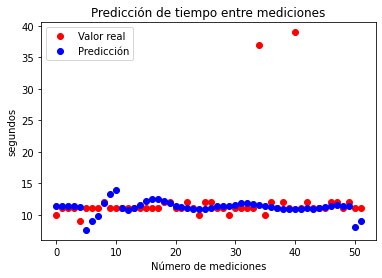

In [2048]:
# Graficar resultados
graficar_predicciones3(n_v[:,0:1],prediccion_tiempo[:,0:1],'segundos')

In [2049]:
n_v_t = sc.transform(n_v)

In [2050]:
#Prediccion con los primeros datos del set de validacion
# Using predicted values to predict next step
X_pred_t = n_v_t.copy()
for i in range(time_step_t,len(X_pred_t)):
    xin_t = X_pred_t[i-time_step_t:i].reshape(1, time_step_t, 2)
    X_pred_t[i] = modelo_duracion.predict(xin_t)

1/1 [==============================] - 0s 11ms/step


In [2051]:
X_pred_t

array([[0.09090909, 0.        ],
       [0.18181818, 0.5824007 ],
       [0.18181818, 0.1854218 ],
       [0.18181818, 0.58404287],
       [0.        , 0.39365956],
       [0.18181818, 0.61871162],
       [0.18181818, 0.54029329],
       [0.18181818, 0.67267892],
       [0.27272727, 0.61159131],
       [0.18181818, 0.5806534 ],
       [0.18181818, 0.62640405],
       [0.18181818, 0.38610622],
       [0.18181818, 0.51755737],
       [0.18181818, 0.53847969],
       [0.18181818, 0.62835609],
       [0.18181818, 0.52813956],
       [0.18181818, 0.419151  ],
       [0.18181818, 0.43642663],
       [0.27272727, 0.48553457],
       [0.27272727, 0.62121026],
       [0.18181818, 0.36473851],
       [0.18181818, 0.28609413],
       [0.27272727, 0.53935551],
       [0.18181818, 0.47512514],
       [0.09090909, 0.55400404],
       [0.27272727, 0.65582201],
       [0.27272727, 0.67642895],
       [0.18181818, 0.6420874 ],
       [0.18181818, 0.57323942],
       [0.09090909, 0.56611059],
       [0.

In [2052]:
prediccion2 = sc.inverse_transform(X_pred_t)

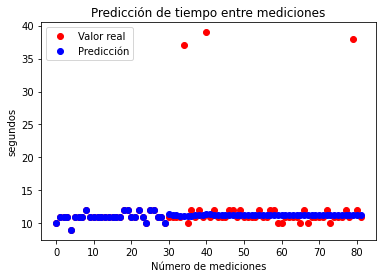

In [2053]:
# Graficar resultados de prediccion de valores futuros
graficar_predicciones3(n_v[:,0:1],prediccion2[:,0:1],'segundos')

In [2054]:
mse_t = mean_squared_error(n_v[time_step_t:,0:1] ,prediccion2[time_step_t:,0:1], squared=False)

In [2055]:
mse_t

6.457922321288336

In [2056]:
n_v[time_step_t:,0:1]

array([[11.],
       [11.],
       [11.],
       [11.],
       [37.],
       [10.],
       [12.],
       [11.],
       [12.],
       [11.],
       [39.],
       [11.],
       [12.],
       [11.],
       [11.],
       [11.],
       [12.],
       [12.],
       [11.],
       [12.],
       [11.],
       [11.],
       [11.],
       [11.],
       [12.],
       [11.],
       [11.],
       [12.],
       [12.],
       [10.],
       [10.],
       [11.],
       [11.],
       [11.],
       [11.],
       [10.],
       [12.],
       [10.],
       [11.],
       [11.],
       [11.],
       [11.],
       [12.],
       [10.],
       [11.],
       [11.],
       [11.],
       [12.],
       [11.],
       [38.],
       [12.],
       [11.]])

In [2057]:
prediccion2[time_step_t:,0:1]

array([[11.3676433 ],
       [11.31891547],
       [11.23637769],
       [11.16278987],
       [11.1278653 ],
       [11.13455687],
       [11.16808195],
       [11.2189431 ],
       [11.2757097 ],
       [11.3178084 ],
       [11.3406826 ],
       [11.34245712],
       [11.3247188 ],
       [11.2955161 ],
       [11.26349361],
       [11.23648095],
       [11.21791734],
       [11.20929585],
       [11.211628  ],
       [11.21827467],
       [11.22788766],
       [11.23970659],
       [11.2500426 ],
       [11.25301975],
       [11.25349215],
       [11.25735016],
       [11.25457528],
       [11.24813318],
       [11.24506178],
       [11.24523717],
       [11.25088102],
       [11.25513619],
       [11.25572513],
       [11.25439563],
       [11.25226526],
       [11.25001113],
       [11.24811892],
       [11.24690793],
       [11.24646357],
       [11.24663633],
       [11.24715282],
       [11.24774635],
       [11.24822317],
       [11.24849051],
       [11.24854378],
       [11